# MOD300: Assignment 4

**Basel Abu Sablih, Anders Bygdås and Aleksander Bø**

Date: **Des 3, 2025**


## Introduction

This project investigates two machine learning problems: unsupervised clustering of astronomical data and supervised prediction of epidemic evolution.

**Topic 1** applies K-means clustering to Milky Way galaxy images to automatically identify and categorize different regions. We explore how different feature encodings (RGB, grayscale, spatial position) affect cluster discovery and whether unsupervised methods can reveal meaningful astronomical structures without prior labels.

**Topic 2** compares traditional statistical models (linear, polynomial regression) with modern ML approaches (neural networks, LSTM) for predicting Ebola epidemic evolution in West Africa. We examine the limitations of data-driven ML models and investigate whether domain knowledge (epidemiological models) can be replaced by machine learning or should be combined with it.

Both topics address fundamental questions about when and how machine learning can be effectively applied, emphasizing the importance of domain knowledge and appropriate model selection.


In [ ]:
# install git package, only run once
#%pip install git+https://github.com/henrysky/milkyway_plot.git

In [1]:
import matplotlib.pyplot as plt
from astropy import units as u
from mw_plot import MWSkyMap

from main import *

# Topic 1


# Task 1: Reproduce the image of the milky way via MWSkyMap


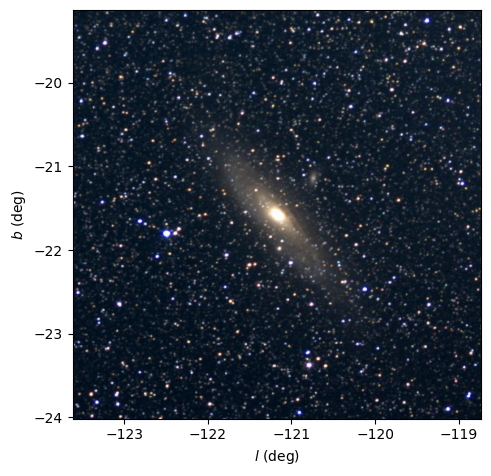

In [3]:
mw1 = MWSkyMap(
    center="M31",
    radius=(8800, 8800) * u.arcsec,
    background="Mellinger color optical survey",
)

fig, ax = plt.subplots(figsize=(5, 5))
mw1.transform(ax)
mw1.savefig('galaxy.png')
plt.show()

## Task 2: Generate multiple visualizations with different centers and radii


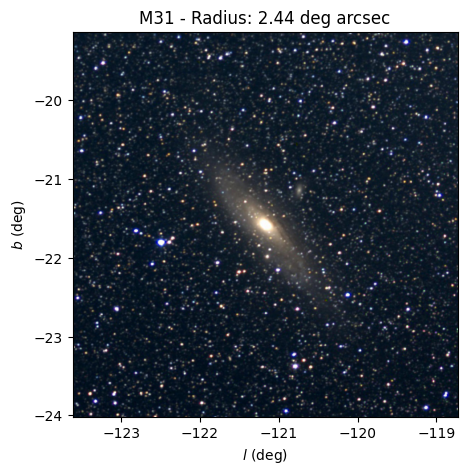

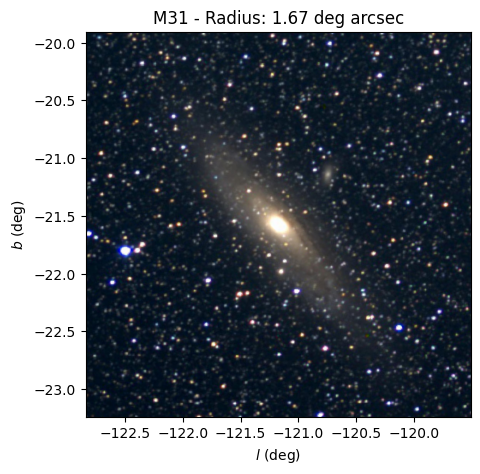

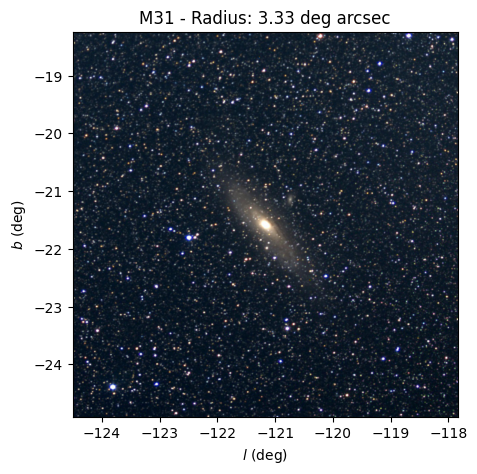

In [2]:
fig1, _ = create_sky_map("M31", (8800, 8800) * u.arcsec, "Mellinger color optical survey")
fig2, _ = create_sky_map("M31", (6000, 6000) * u.arcsec, "Mellinger color optical survey")
fig3, _ = create_sky_map("M31", (12000, 12000) * u.arcsec, "Mellinger color optical survey")

## Task 3: Convert the image to RGB np.array


In [5]:
img_array = plt2rgbarr(fig1)
print(f"Image array shape: {img_array.shape}")
print(f"Image array dtype: {img_array.dtype}")
print(f"Image array min/max values: {img_array.min()}/{img_array.max()}")
print(f"\nFirst pixel RGB values: {img_array[0, 0]}")


Image array shape: (500, 500, 3)
Image array dtype: uint8
Image array min/max values: 0/254

First pixel RGB values: [0 0 0]


## Task 4: Encoding


In [6]:
features, (h, w) = encode_pixels(img_array)

print("Feature array shape", features.shape)
print("Example encoded pixel (R, G, B normalized):", features[0])

Feature array shape (250000, 3)
Example encoded pixel (R, G, B normalized): [0. 0. 0.]


## Task 5: K-means clustering


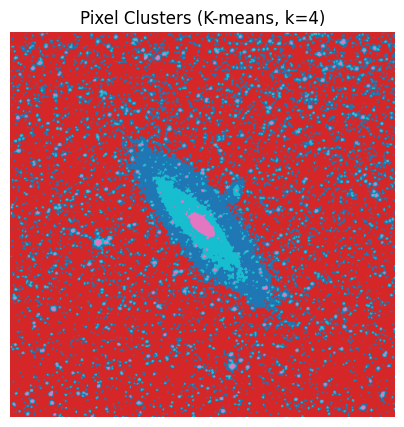

Cluster 0: dark background space - center RGB (normalized) = [ 0.15,  0.17, 0.22]
Cluster 1: dark background space - center RGB (normalized) = [ 0.05,  0.09, 0.14]
Cluster 2: red-ish region (labels - nebulae ) - center RGB (normalized) = [ 0.74,  0.72, 0.71]
Cluster 3: blue-ish region (spiral arms - hot stars) - center RGB (normalized) = [ 0.35,  0.35, 0.36]


In [7]:
label_image, kmeans = kmeans_cluster_pixels(img_array, n_clusters=4)

plot_cluster_labels(label_image, "Pixel Clusters (K-means, k=4)")

for desc in describe_clusters(kmeans): 
    print(desc)

## Task 6: Over-impose your cluster to the image generated in Task 2


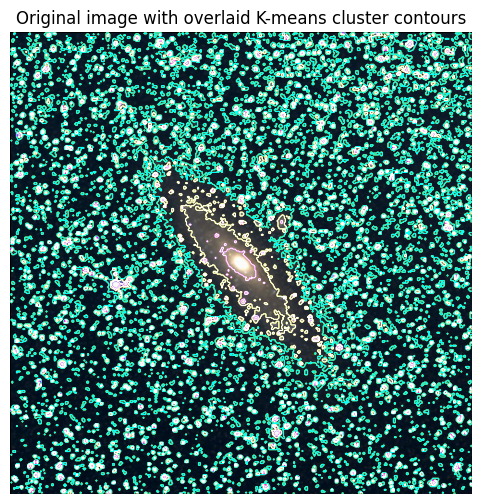

In [8]:
overlay_cluster_contours(img_array, label_image)

## Task 7: Different categories


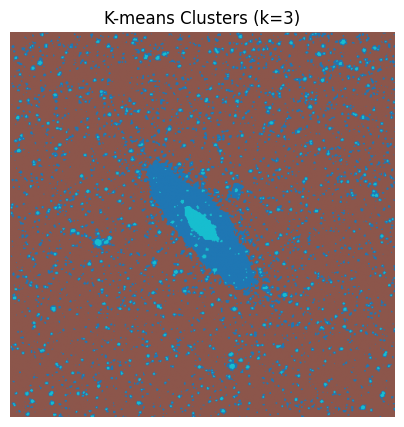

Cluster 0: blue-ish region (spiral arms - hot stars) - center RGB (normalized) = [ 0.24,  0.25, 0.28]
Cluster 1: dark background space - center RGB (normalized) = [ 0.06,  0.10, 0.15]
Cluster 2: red-ish region (labels - nebulae ) - center RGB (normalized) = [ 0.65,  0.63, 0.62]


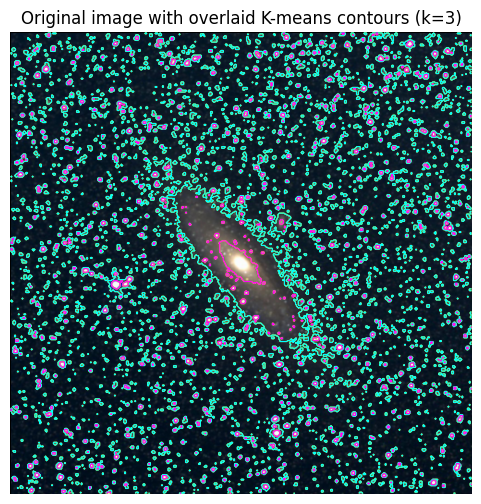

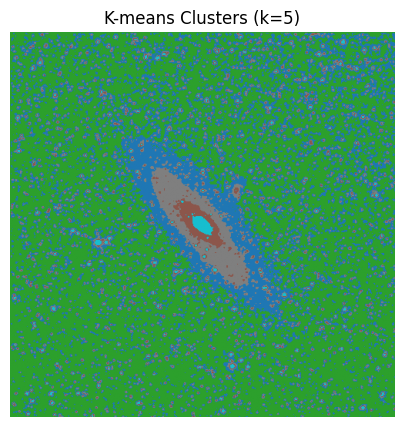

Cluster 0: dark background space - center RGB (normalized) = [ 0.12,  0.15, 0.20]
Cluster 1: dark background space - center RGB (normalized) = [ 0.04,  0.09, 0.14]
Cluster 2: red-ish region (labels - nebulae ) - center RGB (normalized) = [ 0.47,  0.46, 0.46]
Cluster 3: blue-ish region (spiral arms - hot stars) - center RGB (normalized) = [ 0.26,  0.27, 0.29]
Cluster 4: bright core - stars - white-yellow region - center RGB (normalized) = [ 0.82,  0.79, 0.78]


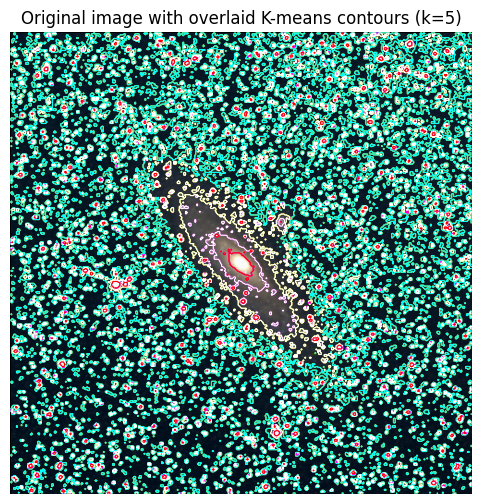

In [9]:
run_task7_experiments(img_array, k_values=(3,5))

# Topic 2: Supervised learning: Machines versus human models, who can save the world??

## Task 0: Reproduce the project 2 exercise 5 plots for Ebola epidemic


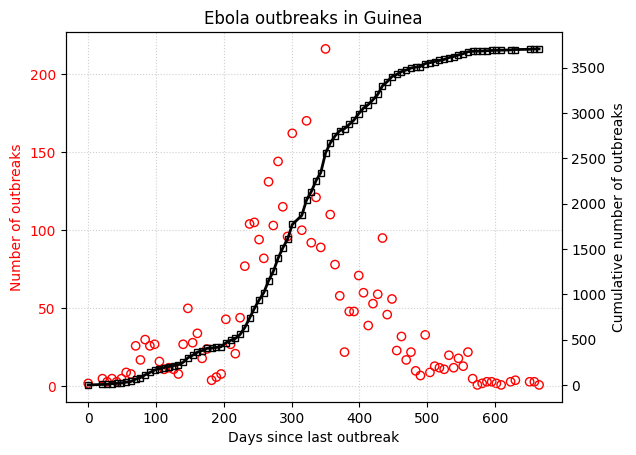

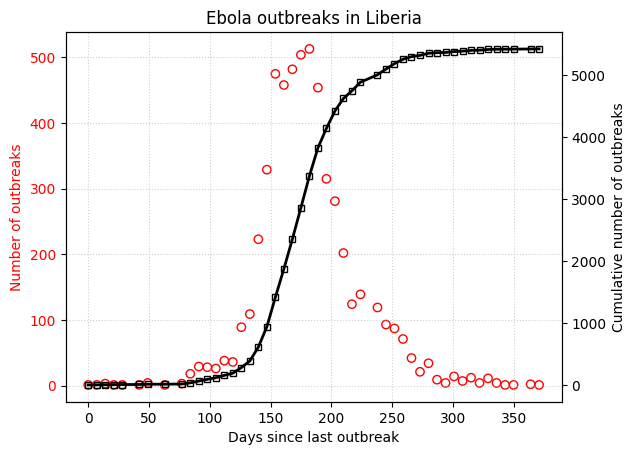

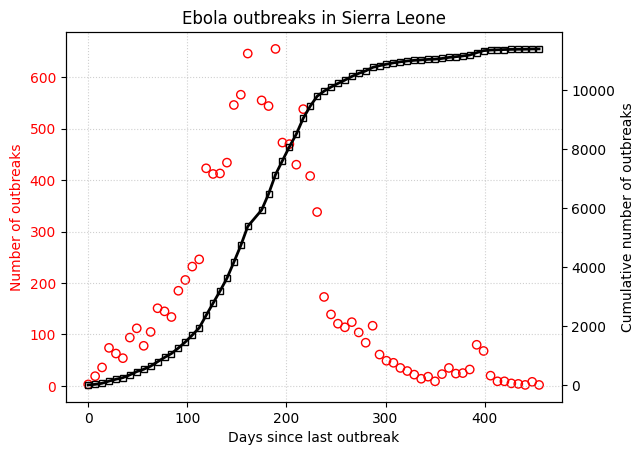

In [10]:

countries_data = load_all_countries_data()

for country, (days, new_cases, cumulative_cases) in countries_data.items():
    plot_ebola_data(days, new_cases, cumulative_cases, country)


## Task 1: Train a line with linear regression on the data for the three countries


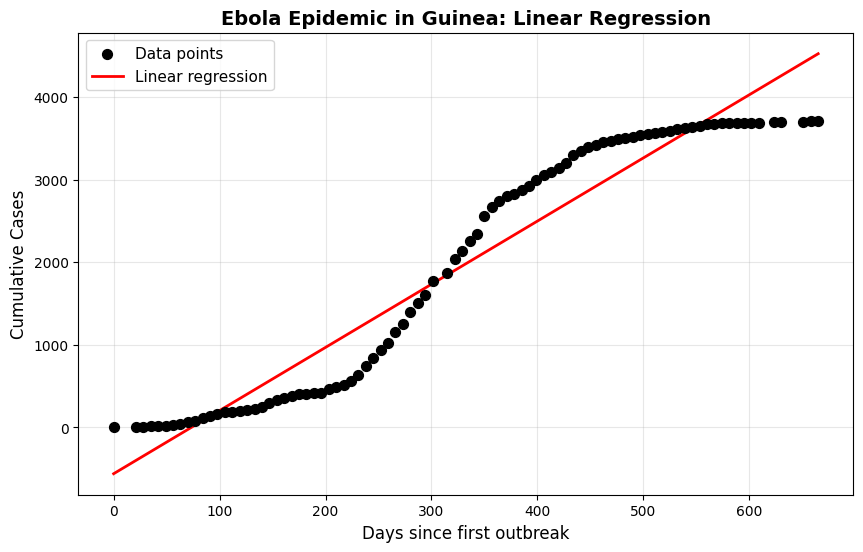

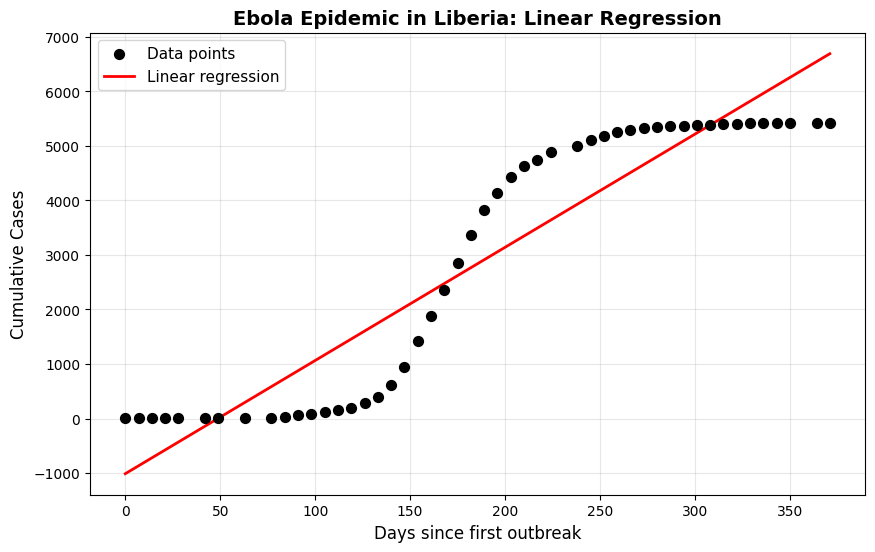

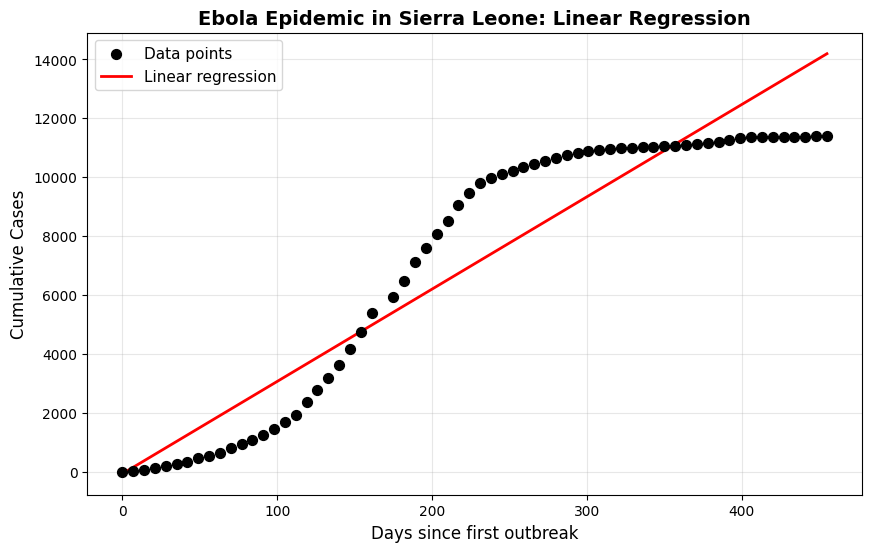

In [11]:

for country, (days, new_cases, cumulative_cases) in countries_data.items():
    model, slope, intercept = train_linear_regression(days, cumulative_cases)
    plot_linear_regression(days, cumulative_cases, model, country)
    plt.show()


## Task 2: Train a better fitting function than a single line with linear regression on the data for the three countries



Analyzing Guinea

Model Comparison for Guinea:
--------------------------------------------------
Linear                    R² = 0.933018
Polynomial (degree 2)     R² = 0.937091
Polynomial (degree 3)     R² = 0.988443

Best model: Polynomial (degree 3) (R² = 0.988443)


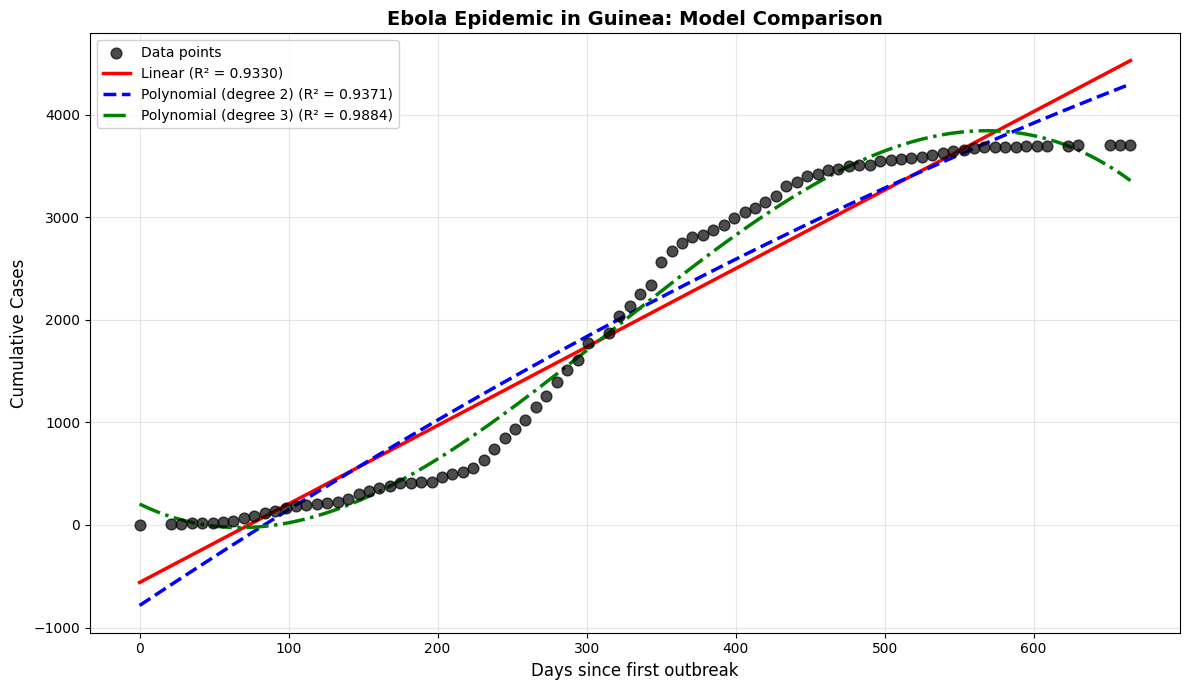

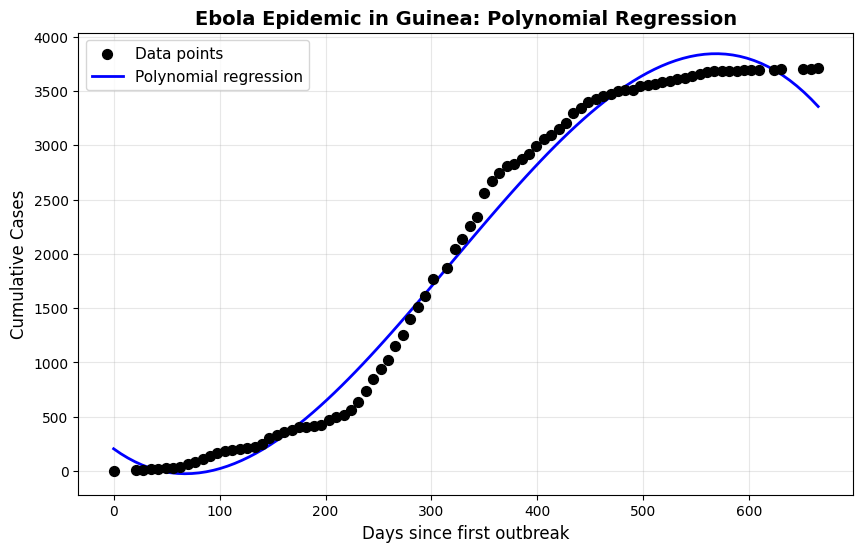


Analyzing Liberia

Model Comparison for Liberia:
--------------------------------------------------
Linear                    R² = 0.871521
Polynomial (degree 2)     R² = 0.873369
Polynomial (degree 3)     R² = 0.965179

Best model: Polynomial (degree 3) (R² = 0.965179)


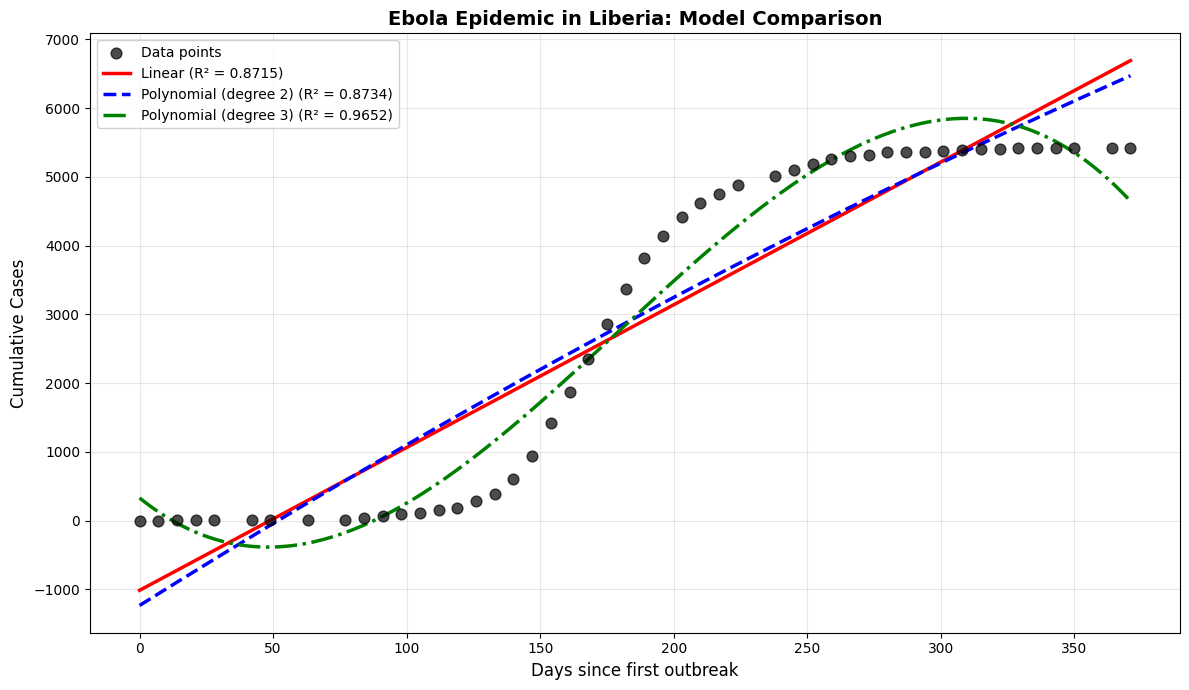

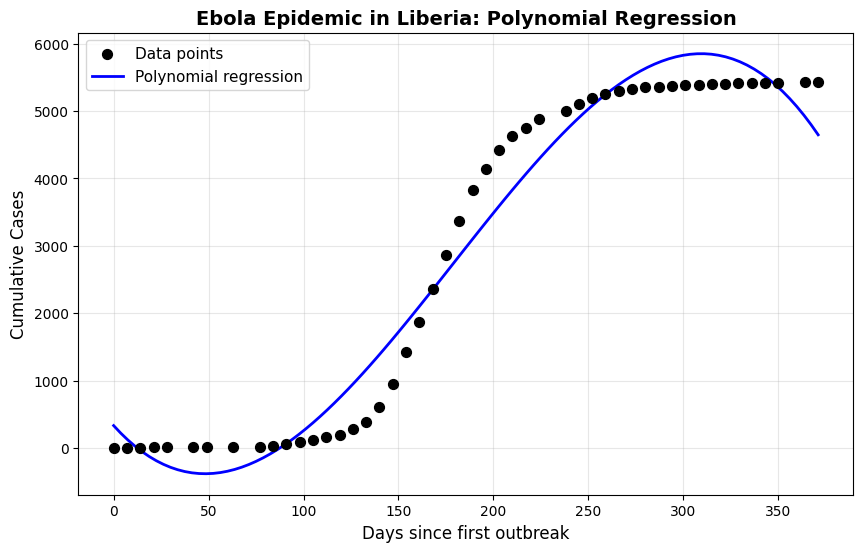


Analyzing Sierra Leone

Model Comparison for Sierra Leone:
--------------------------------------------------
Linear                    R² = 0.887606
Polynomial (degree 2)     R² = 0.952050
Polynomial (degree 3)     R² = 0.976407

Best model: Polynomial (degree 3) (R² = 0.976407)


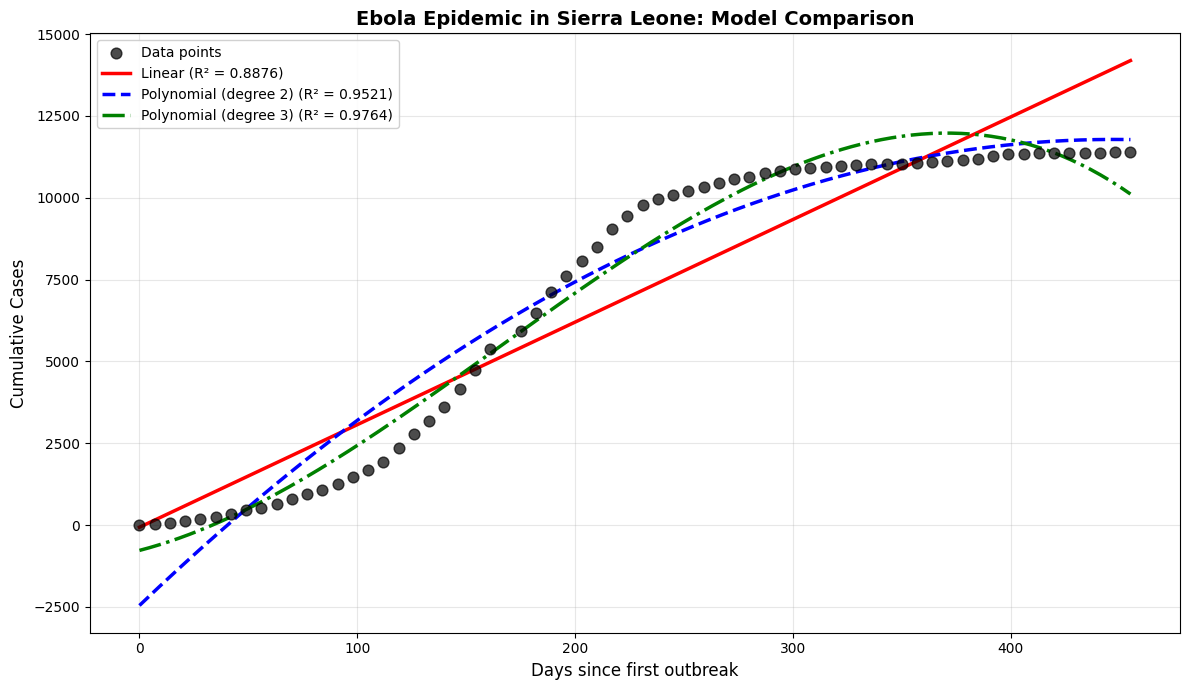

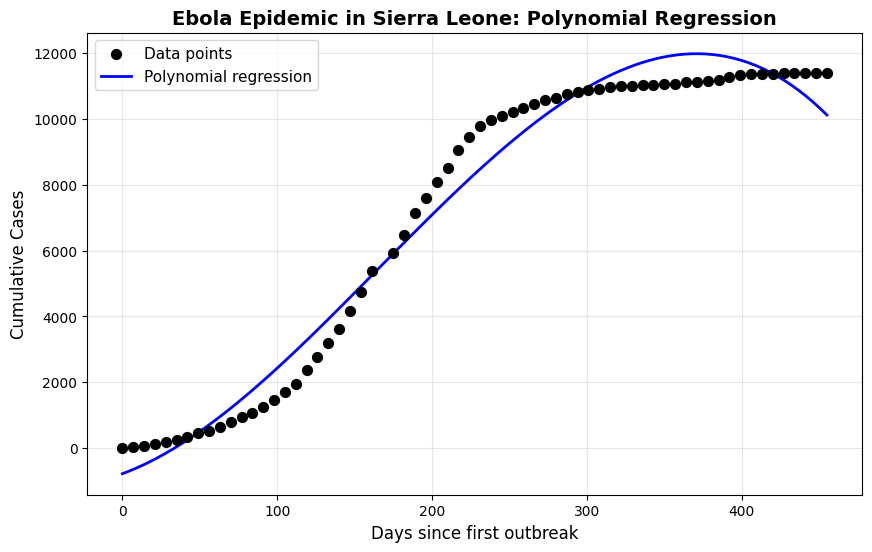

In [12]:


for country, (days, new_cases, cumulative_cases) in countries_data.items():
    print(f"\n{'='*60}")
    print(f"Analyzing {country}")
    print('='*60)
    

    models = compare_models(days, cumulative_cases, country)

    plot_model_comparison(days, cumulative_cases, models, country)
    
    
    best_key = max(models.keys(), key=lambda k: models[k]['r2'])
    if best_key != 'linear':
        best_model = models[best_key]['model']
        plot_polynomial_regression(days, cumulative_cases, best_model, country)
        plt.show()


## Task 3: Train NN network



Task 3 - Neural network for Guinea
Metrics: 
train_r2    : 0.9937
test_r2     : -231.0348
train_rmse  : 107.1654
test_rmse   : 512.5133


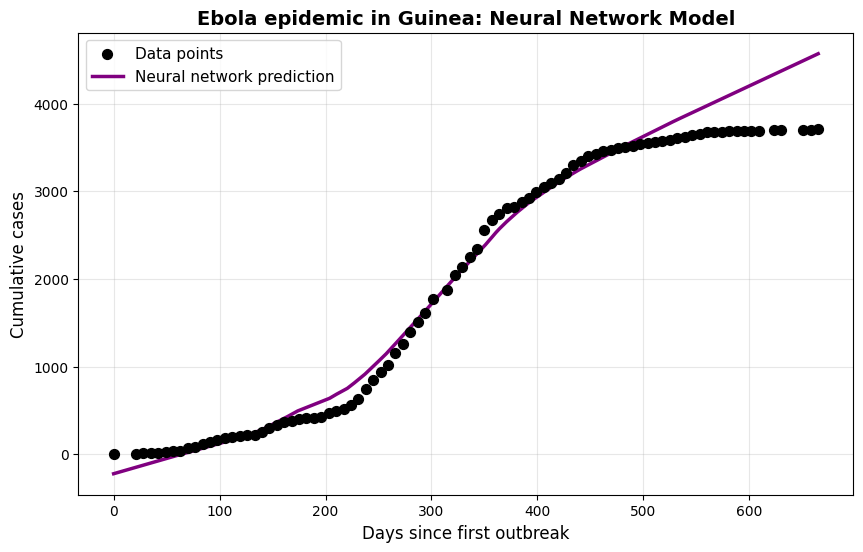


Task 3 - Neural network for Liberia
Metrics: 
train_r2    : 0.9881
test_r2     : -5967.4815
train_rmse  : 246.1306
test_rmse   : 1132.9263


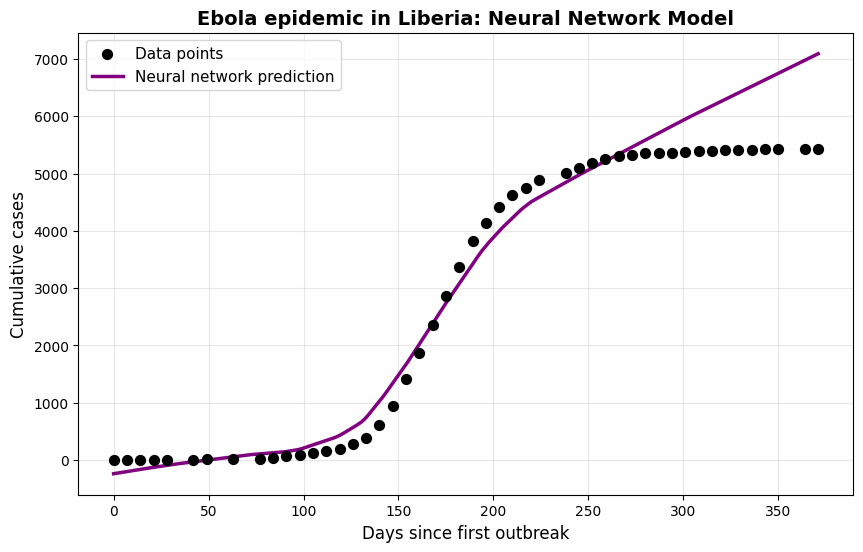


Task 3 - Neural network for Sierra Leone
Metrics: 
train_r2    : 0.9887
test_r2     : -360.8503
train_rmse  : 467.8131
test_rmse   : 1763.0112


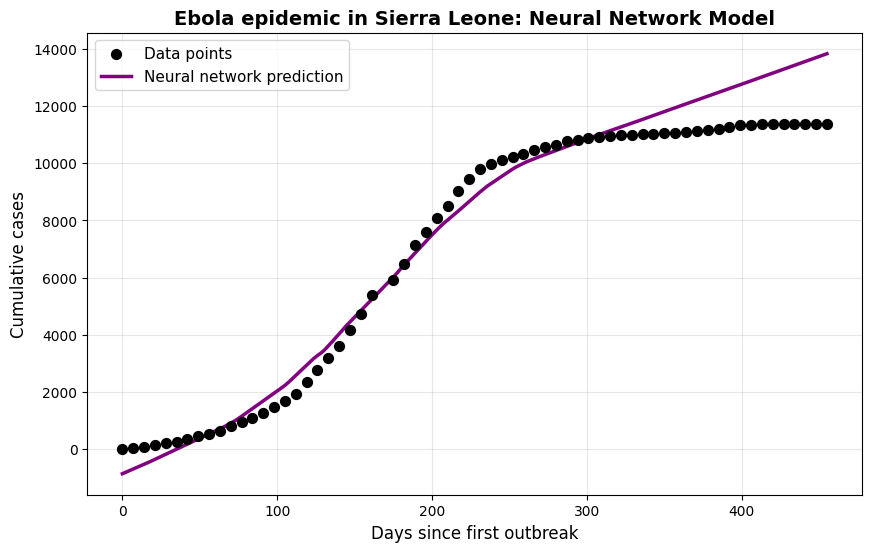

In [13]:
run_task3_neural_networks()

## Task 4: Train LSTM (Long Short-Term Memory) network for time series prediction



LSTM model for Guinea


/Users/aleksanderbo/Documents/Repos/MOD300-Project-3/Project-4/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Metrics:
  train_r2    : 0.9953
  test_r2     : 0.9533
  train_rmse  : 91.8695
  test_rmse   : 7.2686


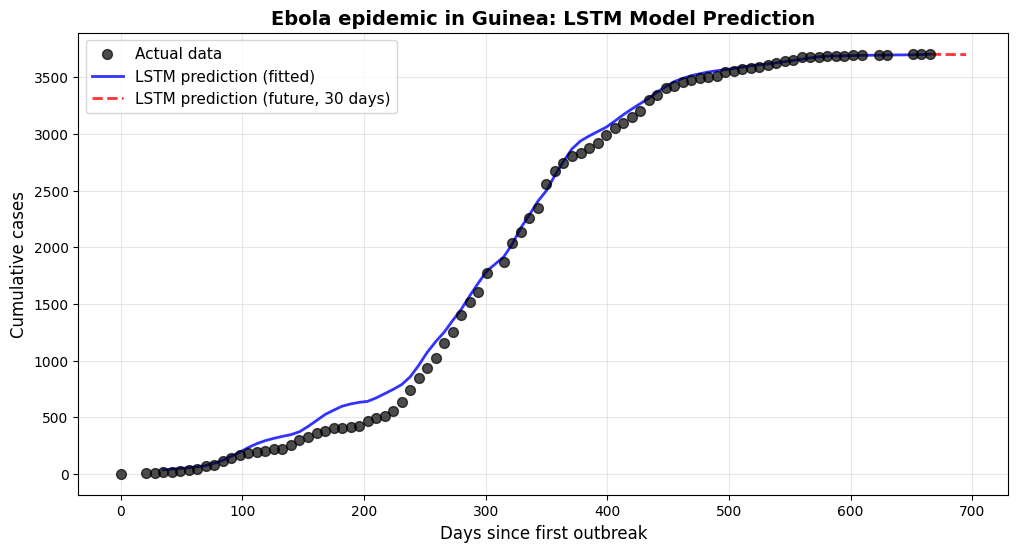


LSTM model for Liberia


/Users/aleksanderbo/Documents/Repos/MOD300-Project-3/Project-4/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Metrics:
  train_r2    : 0.9908
  test_r2     : -10.2055
  train_rmse  : 214.5665
  test_rmse   : 49.0890


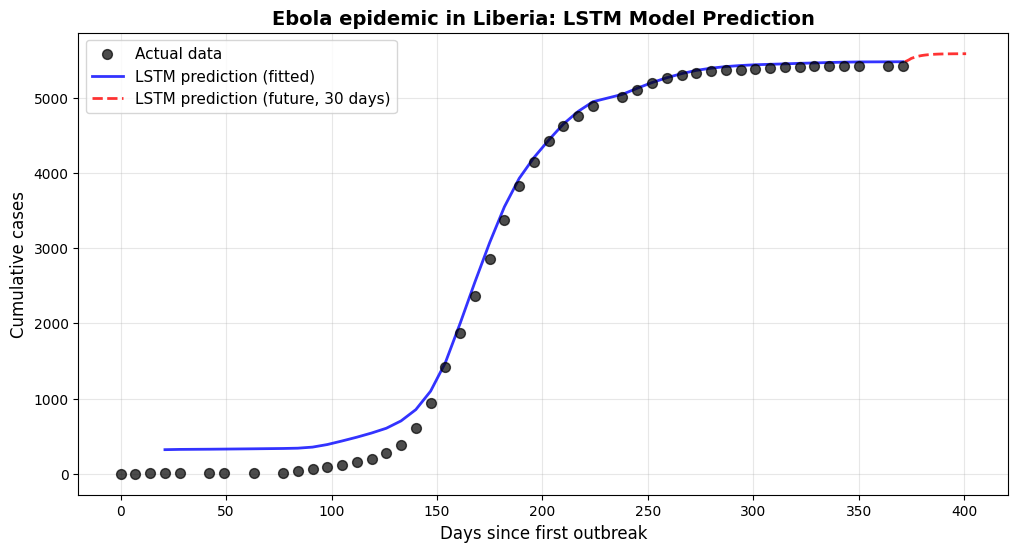


LSTM model for Sierra Leone


/Users/aleksanderbo/Documents/Repos/MOD300-Project-3/Project-4/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Metrics:
  train_r2    : 0.9991
  test_r2     : -0.2443
  train_rmse  : 125.1542
  test_rmse   : 103.3858


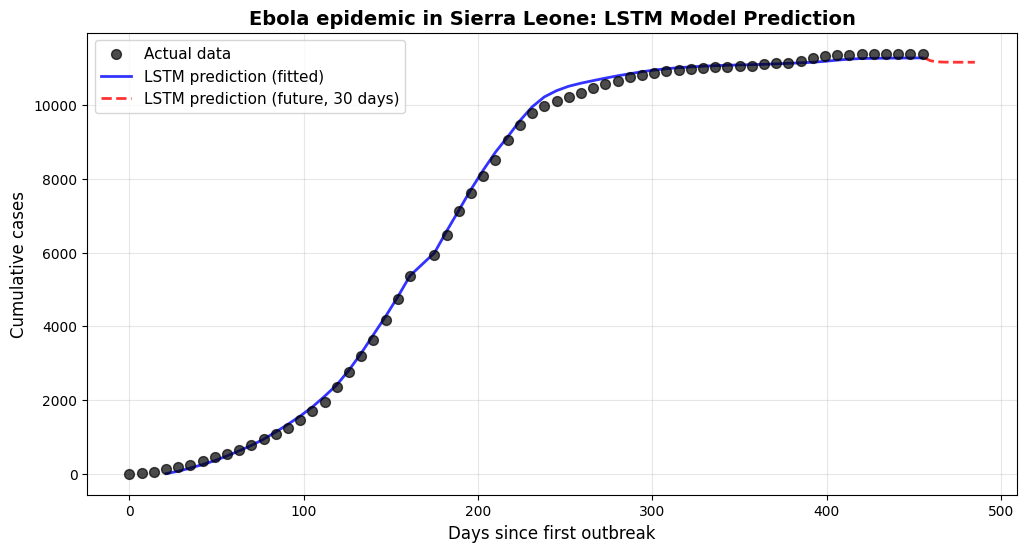

In [3]:
# Train LSTM models for all three countries
run_task4_lstm(n_steps=3, test_size=0.2, epochs=100)

## Task 5: Discussion - Can we ignore modeling and let Machine Learning make predictions?

### Comparison of all models

Each model has different strengths and limitations.


### Discussion

**Model comparison:**

- **Linear**: Simple but assumes constant growth (unrealistic)
- **Polynomial**: Captures curves but can overfit
- **Neural network**: Flexible but showed poor generalization (overfitting)
- **LSTM**: Good for time series but needs tuning

**Can we ignore modeling and let ML make predictions?**

**No.** ML models learn patterns from data but don't understand disease biology. Real epidemics depend on:

- Disease transmission mechanisms (SIR/SEIR models)
- Reproduction number R₀
- Interventions (vaccines, lockdowns)
- Population behavior

**ML limitations:**

- Struggles with extrapolation beyond training data
- Finds correlations, not causation
- Can't predict post-intervention behavior without retraining
- Often overfits (memorizes training data)

**Conclusion:** ML should **enhance** epidemiological models (like SIR/SEIR), not replace them. The best approach combines domain knowledge with ML's pattern recognition.


# Usage of AI

Aleksander: Generate docstrings, debugging errors, summarize and explain topics.

Anders: ...

Basel: Undestand the topics better, asking for better approach, writing docstrings, and solving errors


## Individual Contributions

**Basel Abu Sablih:**

- Topic 1: Task 7(removed because Anders and I did it at the same time)
- Topic 2: Task 0-3

**Anders Bygdås:**

- ...

**Aleksander Bø:**

- Topic 1: Task 1-3, 6
- Topic 2: Task 4-5


## Self-Reflection

### What we learned

- **Topic 1**: Feature encoding (RGB, grayscale, spatial) fundamentally changes clustering results. Unsupervised methods discover patterns but need domain knowledge to interpret.
- **Topic 2**: Nneural networks can overfit; simpler models often generalize better.

### Challenges

- Time series handling (LSTM sequences, chronological splitting)
- Overfitting in neural networks
- Integrating multiple libraries (astropy, sklearn, tensorflow)

### Key takeaways

1. Encoding matters, data representation changes what patterns ML finds
2. Domain knowledge is essential for interpreting ML results
3. Simpler models often outperform complex ones
